In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [15]:
boston = load_boston()

In [13]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

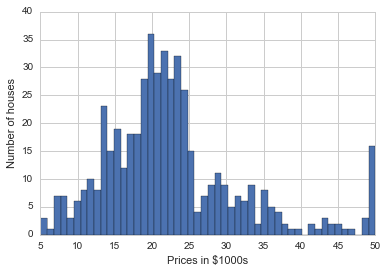

In [7]:
plt.hist(boston.target,bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

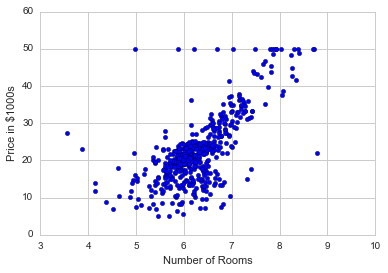

In [9]:
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Price in $1000s')
plt.xlabel('Number of Rooms')

In [11]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [12]:
boston_df['Price'] = boston.target

In [13]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


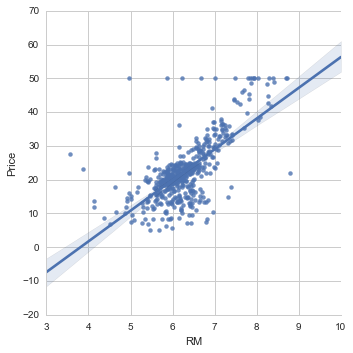

In [14]:
sns.lmplot('RM','Price',data = boston_df)

In [18]:
X = np.vstack(boston_df.RM)

In [20]:
Y = boston_df.Price

In [21]:
X = np.array([[value,1] for value in X] )

In [22]:
m,b = np.linalg.lstsq(X,Y)[0]

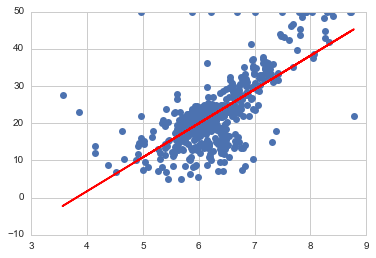

In [24]:
plt.plot(boston_df.RM,boston_df.Price,'o')
x = boston_df.RM
plt.plot(x,m*x + b,'r',label = 'Best fit line')

In [27]:
result = np.linalg.lstsq(X,Y)
error_total = result[1]
rmse = np.sqrt(error_total/len(X))
print( 'root mean square error was %.2f' %rmse)


root mean square error was 6.60


In [28]:
import sklearn 
from sklearn.linear_model import LinearRegression


In [29]:
lreg = LinearRegression()

In [32]:
X_multi = boston_df.drop('Price',1)
Y_target = boston_df.Price

In [33]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
print ('The estimated intercept coefficient is %.2f' % lreg.intercept_)
print('The number of coefficients used was %d' %len(lreg.coef_))

The estimated intercept coefficient is 36.49
The number of coefficients used was 13


In [36]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

In [37]:
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [41]:
X_train,X_test,Y_train,Y_test = sklearn.cross_validation.train_test_split(X, boston_df.Price)

In [42]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [43]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [48]:
print("Fit a model X_train, and calculate the MSE with Y_train: %.2f"%np.mean((Y_train-pred_train)**2))
print("Fit a model x_train , and calculate the MSE with  X_test and Y_test: %.2f"
      %np.mean((Y_test - pred_test)**2))

Fit a model X_train, and calculate the MSE with Y_train: 35.74
Fit a model x_train , and calculate the MSE with  X_test and Y_test: 68.54


ValueError: operands could not be broadcast together with shapes (127,) (506,) 

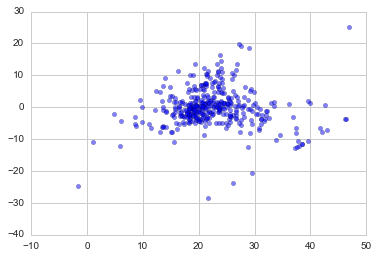

In [50]:
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha = 0.5)
test = plt.scatter(pred_test,(pred_test- Y-test),c='r',alpha = .5)
plt.hlines(y=0,xmin = -10, xmax = 10)
plt.legend((train,test),('Training','Test'),loc ='lower left')
plt.title('Residual Plots')

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.api as sm

In [4]:
df = sm.datasets.fair.load_pandas().data

In [5]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32,9.0,3,3,17,2,5,0.111111
1,3,27,13.0,3,1,14,3,4,3.230769
2,4,22,2.5,0,1,16,3,5,1.400000
3,4,37,16.5,4,3,16,5,5,0.727273
4,5,27,9.0,1,1,14,3,4,4.666666


In [6]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32,9.0,3,3,17,2,5,0.111111
1,3,27,13.0,3,1,14,3,4,3.230769
2,4,22,2.5,0,1,16,3,5,1.400000
3,4,37,16.5,4,3,16,5,5,0.727273
4,5,27,9.0,1,1,14,3,4,4.666666


In [7]:
df


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32.0,9.0,3.0,3,17,2,5,0.111111
1,3,27.0,13.0,3.0,1,14,3,4,3.230769
2,4,22.0,2.5,0.0,1,16,3,5,1.400000
3,4,37.0,16.5,4.0,3,16,5,5,0.727273
4,5,27.0,9.0,1.0,1,14,3,4,4.666666
5,4,27.0,9.0,0.0,2,14,3,4,4.666666
6,5,37.0,23.0,5.5,2,12,5,4,0.852174
7,5,37.0,23.0,5.5,2,12,2,3,1.826086
8,3,22.0,2.5,0.0,2,12,3,3,4.799999
9,3,27.0,6.0,0.0,1,16,3,5,1.333333


In [9]:
def affair_check(x):
    if x!= 0:
        return 1
    else: 
        return 0


In [10]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [12]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


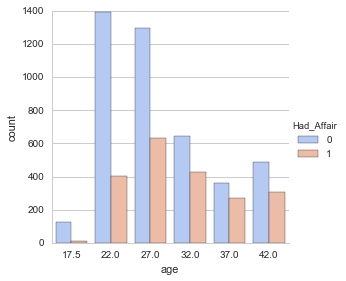

In [14]:
sns.factorplot('age',data=df,hue='Had_Affair',palette='coolwarm',kind = "count")

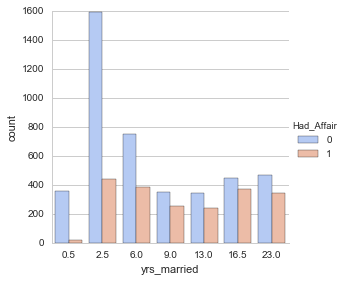

In [16]:
sns.factorplot('yrs_married',data=df,hue='Had_Affair',palette = 'coolwarm',kind = 'count')

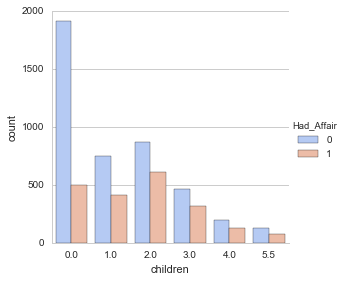

In [17]:
sns.factorplot('children',data=df,hue='Had_Affair',palette = 'coolwarm',kind = 'count')

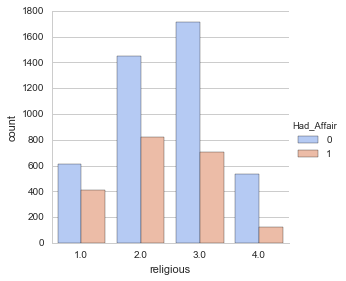

In [19]:
sns.factorplot('religious',data=df,hue='Had_Affair',palette = 'coolwarm',kind = 'count')

In [21]:
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [22]:
occ_dummies.head()


,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [23]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']

In [24]:
hus_occ_dummies.columns = ['hocc1','hooc2','hooc3','hooc4','hooc5','hooc6']

In [26]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis = 1)

In [27]:
dummies = pd.concat([occ_dummies, hus_occ_dummies],axis = 1)

In [28]:
X = pd.concat([X,dummies],axis=1)

In [29]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hooc2,hooc3,hooc4,hooc5,hooc6
0,3,32,9.0,3,3,17,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5,27,9.0,1,1,14,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [30]:
Y = df.Had_Affair

In [31]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [32]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [35]:
X = X.drop('hocc1',axis=1)

In [36]:
X = X.drop('affairs',axis=1)

In [37]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hooc2,hooc3,hooc4,hooc5,hooc6
0,3,32,9.0,3,3,17,1,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,0,1,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,0,1,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0,0,0,1,0,0,0,0,1,0
4,5,27,9.0,1,1,14,0,1,0,0,0,0,0,1,0,0


In [38]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [40]:
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [41]:
log_model = LogisticRegression()
log_model.fit(X,Y)
log_model.score(X,Y)

0.7260446120012567

In [42]:
Y.mean()

0.32249450204209867

In [44]:
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

TypeError: data argument can't be an iterator

In [45]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y)

In [46]:
log_model2 = LogisticRegression()
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
class_predict = log_model2.predict(X_test)

In [50]:
print (metrics.accuracy_score(Y_test,class_predict))

0.738693467337
